# Explore Gold Test Dataset

Analyze the gold test dataset to understand label distribution and statistics.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Load the Dataset

In [2]:
# Load all samples from gold test dataset
samples = []
with open('../../Data/gold_testdataset_27labels.ndjson', 'r') as f:
    for line in f:
        line = line.strip()
        if line.endswith(','):
            line = line[:-1]  # Remove trailing comma
        samples.append(json.loads(line))

print(f"Total samples: {len(samples)}")

Total samples: 1772


## Basic Statistics

In [3]:
# Count total entities
total_entities = sum(len(s['normalized_entities']) for s in samples)

# Calculate average entities per sample
avg_entities = total_entities / len(samples)

print(f"Total entities: {total_entities}")
print(f"Average entities per sample: {avg_entities:.2f}")

Total entities: 6815
Average entities per sample: 3.85


## Label Distribution

In [4]:
# Count each label
label_counts = Counter()

for sample in samples:
    for entity in sample['normalized_entities']:
        label_counts[entity['label']] += 1

# Convert to DataFrame and sort
label_df = pd.DataFrame([
    {'Label': label, 'Count': count} 
    for label, count in label_counts.items()
]).sort_values('Count', ascending=False)

print(f"\nTotal unique labels: {len(label_df)}")
print(f"\nLabel distribution:")
label_df


Total unique labels: 28

Label distribution:


,Label,Count
3,full name,1306
0,date,973
14,email address,610
4,organization,504
9,address,415
7,username,338
10,phone number,334
17,bank account number,242
1,tax identification number,228
2,credit card number,212


## Visualize Label Distribution

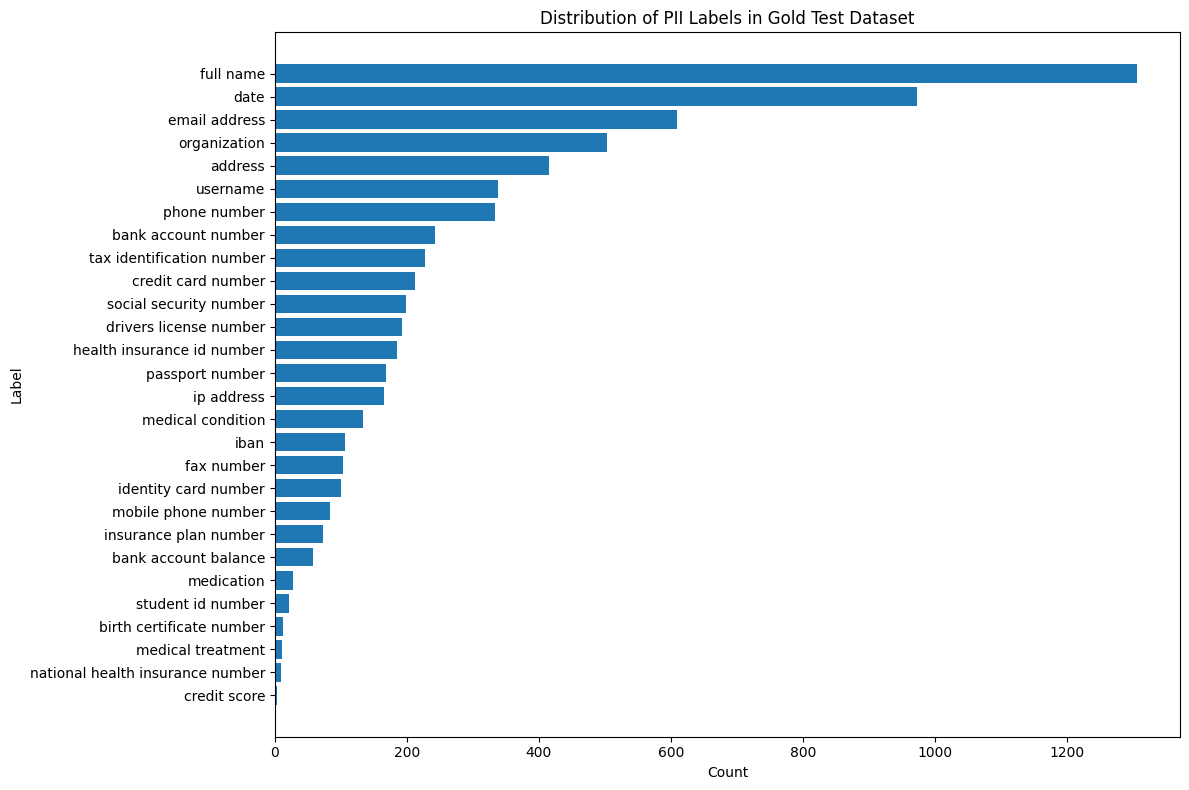

In [5]:
# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(label_df['Label'], label_df['Count'])
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Distribution of PII Labels in Gold Test Dataset')
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest count at top
plt.show()

## Top 10 Most Common Labels

In [6]:
print("Top 10 most common labels:\n")
for i, row in label_df.head(10).iterrows():
    percentage = (row['Count'] / total_entities) * 100
    print(f"{row['Label']:30s} : {row['Count']:4d} ({percentage:5.1f}%)")

Top 10 most common labels:

full name                      : 1306 ( 19.2%)
date                           :  973 ( 14.3%)
email address                  :  610 (  9.0%)
organization                   :  504 (  7.4%)
address                        :  415 (  6.1%)
username                       :  338 (  5.0%)
phone number                   :  334 (  4.9%)
bank account number            :  242 (  3.6%)
tax identification number      :  228 (  3.3%)
credit card number             :  212 (  3.1%)


## Rare Labels (Less than 50 occurrences)

In [7]:
rare_labels = label_df[label_df['Count'] < 50]

if len(rare_labels) > 0:
    print(f"Rare labels (count < 50): {len(rare_labels)} labels\n")
    for i, row in rare_labels.iterrows():
        print(f"{row['Label']:30s} : {row['Count']:4d}")
else:
    print("No rare labels found (all labels have 50+ occurrences)")

Rare labels (count < 50): 6 labels

medication                     :   27
student id number              :   22
birth certificate number       :   12
medical treatment              :   11
national health insurance number :   10
credit score                   :    3


## Sample Text Lengths

In [8]:
# Analyze text lengths
text_lengths = [len(s['text']) for s in samples]

print(f"Text length statistics:")
print(f"  Minimum: {min(text_lengths)} characters")
print(f"  Maximum: {max(text_lengths)} characters")
print(f"  Average: {sum(text_lengths)/len(text_lengths):.0f} characters")
print(f"  Median: {sorted(text_lengths)[len(text_lengths)//2]} characters")

Text length statistics:
  Minimum: 35 characters
  Maximum: 2278 characters
  Average: 499 characters
  Median: 373 characters


## Show Example Samples

In [9]:
# Show 3 random examples
import random
random.seed(42)

examples = random.sample(samples, 3)

for i, sample in enumerate(examples, 1):
    print(f"\n{'='*80}")
    print(f"Example {i}")
    print(f"{'='*80}")
    print(f"Text: {sample['text'][:200]}...")
    print(f"\nEntities ({len(sample['normalized_entities'])} total):")
    for entity in sample['normalized_entities']:
        print(f"  - {entity['text']:30s} → {entity['label']}")


Example 1
Text: Payment required for property tax pertaining to Romaguera Port 32627. Amount payable is S/.0.00b....

Entities (2 total):
  - Romaguera Port                 → address
  - S/.0.00b                       → bank account balance

Example 2
Text: All students taking the standardized test should be prepared to provide their MR6730074271010090029008033 and 1TEj87namdSeo9QjeTn1neyGiHxPVGbELr for registration. Security trianing for the Mozilla/5.0...

Entities (1 total):
  - MR6730074271010090029008033    → iban

Example 3
Text: Disaster emergency form: Fill A@tutanota.com, Arguedas, and occupation Animator. Provide IP [IPV4_1] for confirmation and address 483. Specify financial info 630453088616837 and manner of currency GBP...

Entities (3 total):
  - A@tutanota.com                 → email address
  - Arguedas                       → full name
  - 630453088616837                → credit card number


## Summary Statistics Table

In [10]:
# Create summary table
summary = pd.DataFrame([
    {'Metric': 'Total Samples', 'Value': len(samples)},
    {'Metric': 'Total Entities', 'Value': total_entities},
    {'Metric': 'Unique Labels', 'Value': len(label_df)},
    {'Metric': 'Avg Entities/Sample', 'Value': f"{avg_entities:.2f}"},
    {'Metric': 'Most Common Label', 'Value': label_df.iloc[0]['Label']},
    {'Metric': 'Most Common Count', 'Value': label_df.iloc[0]['Count']},
])

print("\nDataset Summary:")
summary


Dataset Summary:


,Metric,Value
0,Total Samples,1772
1,Total Entities,6815
2,Unique Labels,28
3,Avg Entities/Sample,3.85
4,Most Common Label,full name
5,Most Common Count,1306
